## Examen final - 13/05/2024

### Ejercicio 1

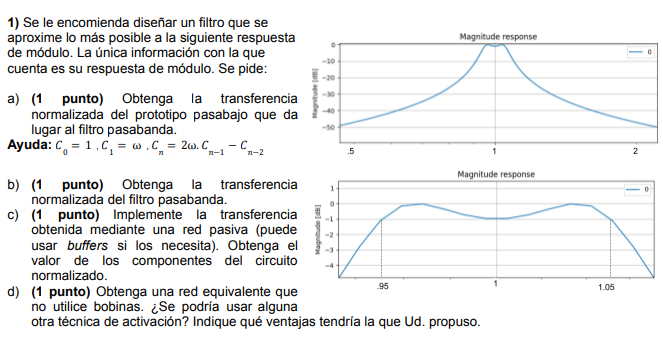

En el caso de este ejercicio, se adjunta el desarrollo completo manuscrito y luego se vuelve a trabajar, sección por sección descripto en Markdown y simulado

##### Desarrollo tradicional

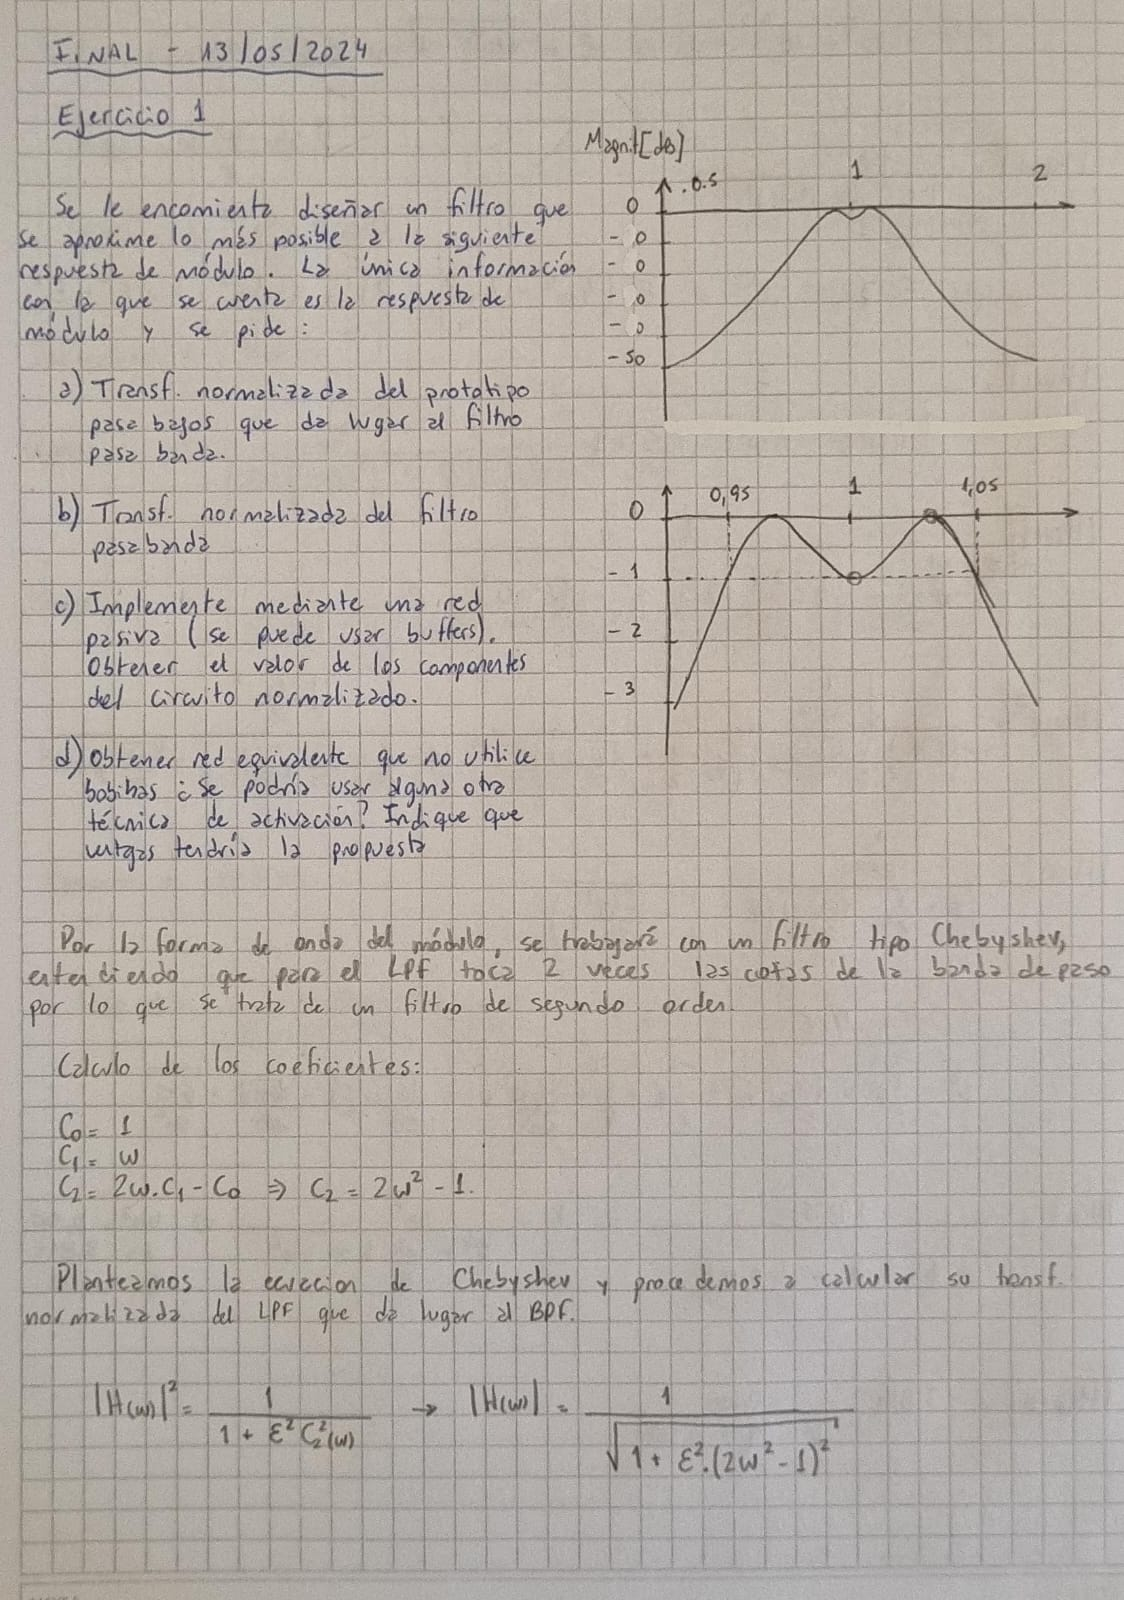

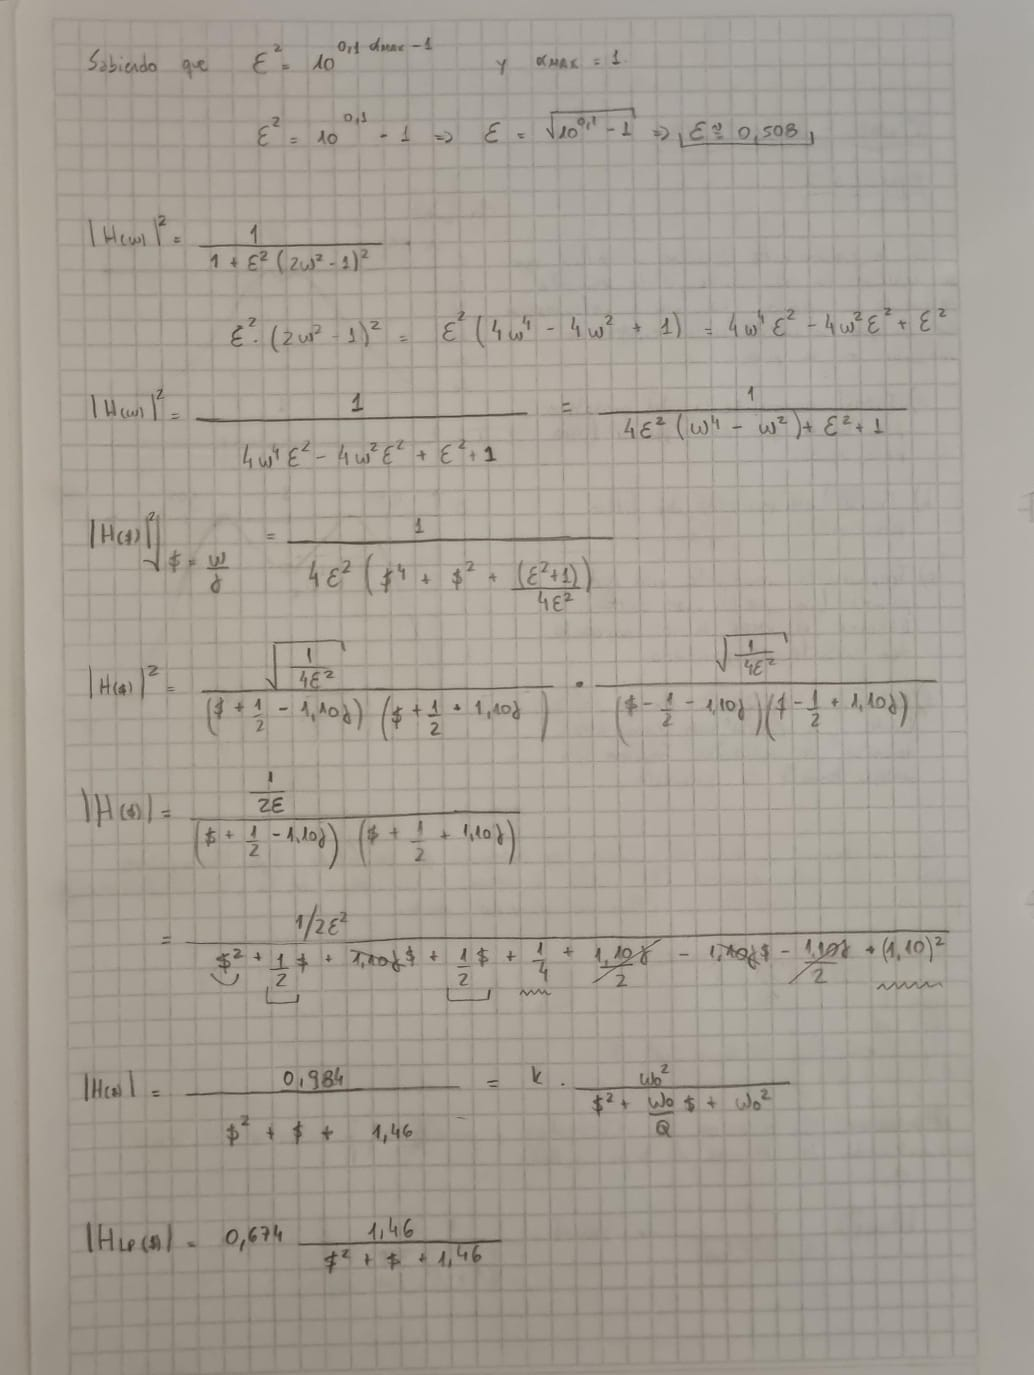

Epsilon: 0.5088471399095875


C:\Users\Mati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\signal\_filter_design.py:1112: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)


<IPython.core.display.Math object>

C:\Users\Mati\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\signal\_ltisys.py:599: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)


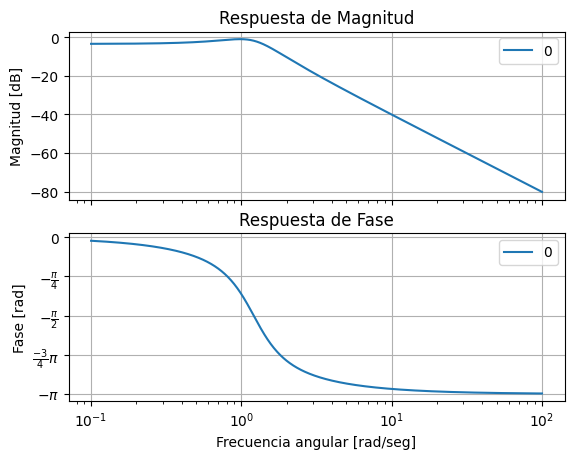

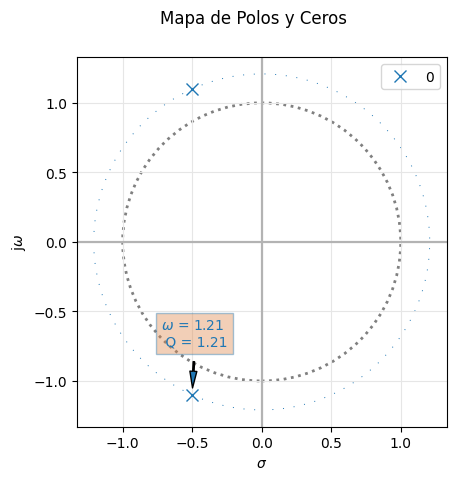

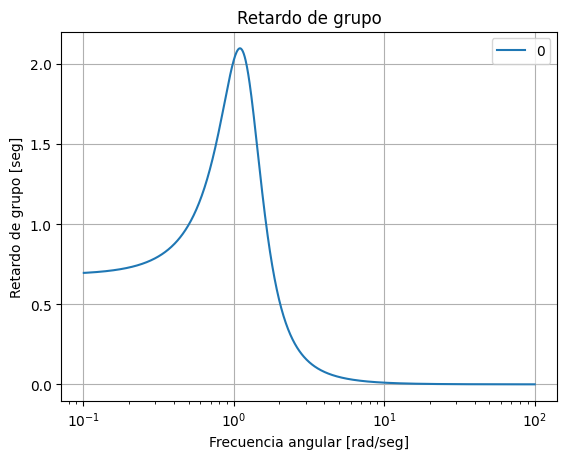

In [4]:
import numpy as np
from pytc2.sistemas_lineales import tf2sos_analog, analyze_sys, pretty_print_SOS
import scipy.signal as sig
import math

epsilon = math.sqrt(10**0.1 - 1)
print("Epsilon: " + str(epsilon))

# Definición de una implementación de analyze_sys para evitar logueos innecesarios, mejorando la prolijidad.
def analyze_sys_silent(all_sys, sys_name=None, img_ext='none', same_figs=True, annotations=True, xaxis='omega', fs=2*np.pi):
    analyze_sys(all_sys, sys_name=None, img_ext='none', same_figs=True, annotations=True, xaxis='omega', fs=2*np.pi)
    return

# Con los datos definidos anteriormente, se arman los array de la transferencia.
num = np.array([0, 0, 0.984])
den = np.array([1, 1, 1.46])
tf_bicuad_sos = tf2sos_analog( num, den )

# Imprimir en formato latex la transferencia
pretty_print_SOS(tf_bicuad_sos, mode='omegayq')

# Plotear de forma silenciosa las características de mi función 
analyze_sys_silent([sig.TransferFunction(num,den)], 'mi_bicuad', same_figs=False)

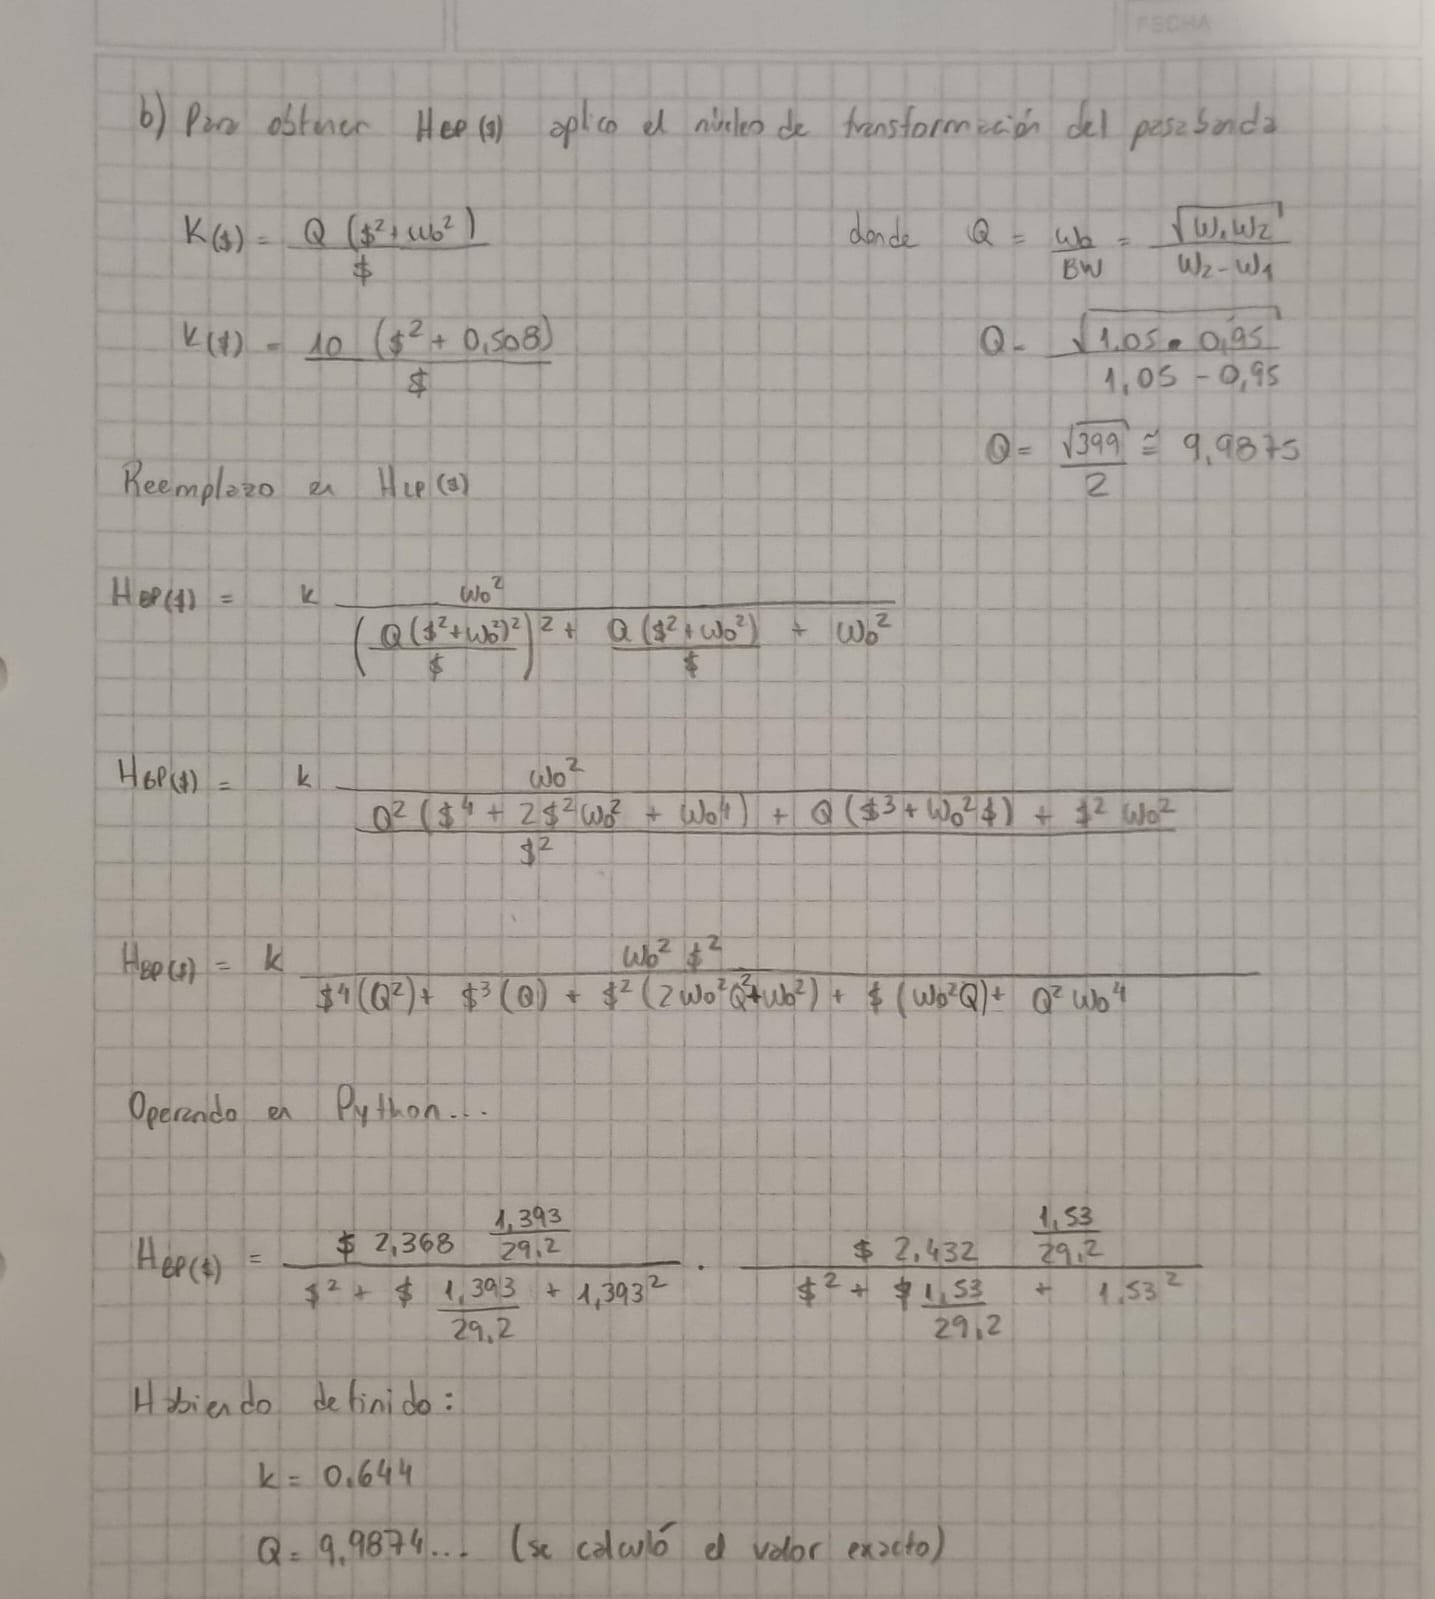

k = 0.674
Q = 9.98749217771908


<IPython.core.display.Math object>

Text(0.5, 1.0, 'Detalle de la banda de paso')

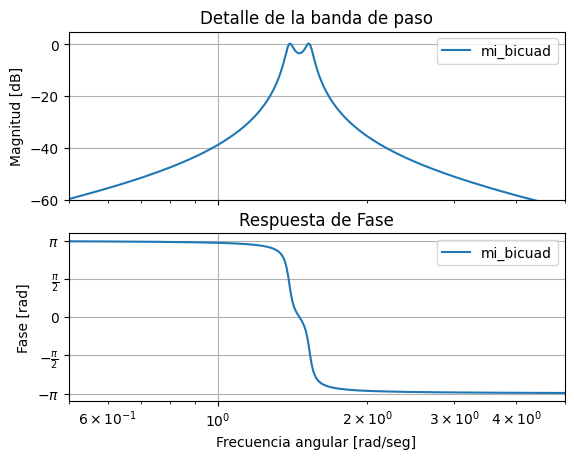

In [23]:
import matplotlib.pyplot as plt
import math
from pytc2.sistemas_lineales import tf2sos_analog, analyze_sys, pretty_print_SOS
import scipy.signal as sig

# Definición de una implementación de analyze_sys para evitar logueos innecesarios, mejorando la prolijidad.
def analyze_sys_silent(all_sys, sys_name=None, img_ext='none', same_figs=True, annotations=True, xaxis='omega', fs=2*np.pi):
    analyze_sys(all_sys, sys_name=None, img_ext='none', same_figs=True, annotations=True, xaxis='omega', fs=2*np.pi)
    return

w_0 = 1.46
k = 0.674
print("k = " + str(k))

w1 = 0.95
w2 = 1.05

Q = (math.sqrt(w1*w2)/(w2-w1))
print("Q = " + str(Q))


# Calculamos los coeficientes del denominador para mayor claridad.
A = Q**2
B = Q
C = ((2 * w_0**2 * Q**2) + (w_0**2))
D = w_0**2 * Q
E = Q**2 * w_0**4

# Con los datos definidos anteriormente, se arman los array de la transferencia.
kn = k
kp = 1
num = kn * np.array([w_0**2, 0, 0])
den = kp * np.array([A, B, C, D, E])
tf_bicuad_sos = tf2sos_analog( num, den )

# Imprimir en formato latex la transferencia
#pretty_print_SOS(tf_bicuad_sos)
pretty_print_SOS(tf_bicuad_sos, mode="omegayq")


# Plotear de forma silenciosa las características de mi función 
asy_axes = analyze_sys([sig.TransferFunction(num,den)], 'mi_bicuad', same_figs=False)


# Imprimir en formato latex la transferencia


# el caracter "_" descarta la salida de la función
# cerramos todas las visualizaciones salvo la respuesta en frecuencia
plt.close(2)
plt.close(3)
plt.close(4)

plt.sca(asy_axes[0][1][0])
max_ripple = np.max(np.array(1))
plt.ylim(np.array([-60, 5]) )
plt.xlim(np.array([0.5, 5]) )
plt.title('Detalle de la banda de paso')



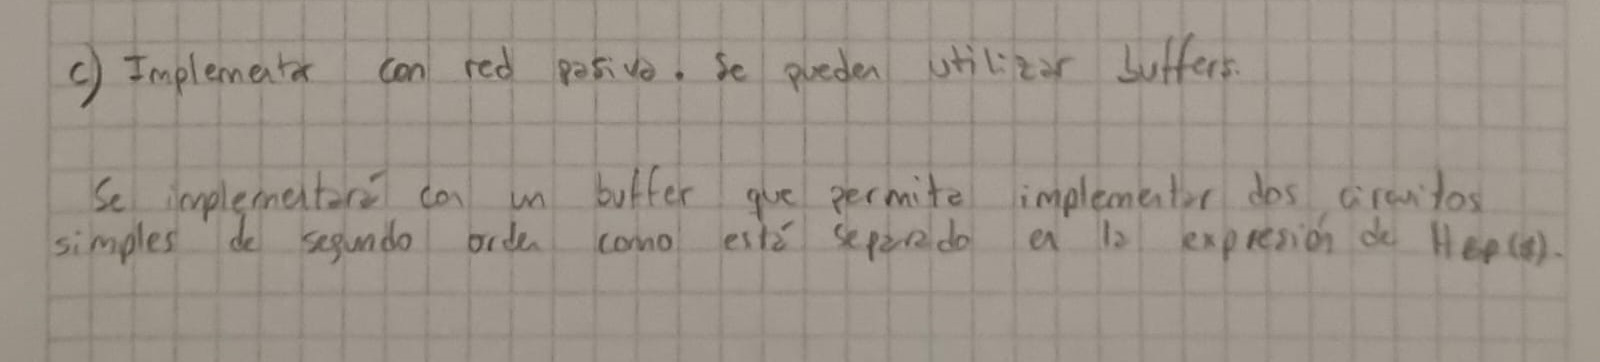

# Machete
## Revisión con Mariano

con cheb1ap calculamos zpk y luego num,den para verificar la transferencia que hay que obtener para garantizar el realce.
con esto, validar la matemática en lápiz y papel, luego rehacer.

<IPython.core.display.Math object>

Text(0.5, 1.0, 'Detalle de la banda de paso')

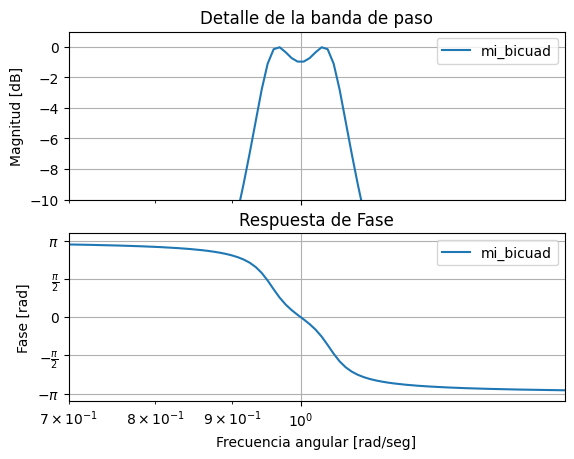

In [24]:
import matplotlib.pyplot as plt

z,p,k = sig.cheb1ap(2, 1)
num,den = sig.zpk2tf(z,p,k)
tf_bicuad_sos = tf2sos_analog( num, den )

# Imprimir en formato latex la transferencia
#pretty_print_SOS(tf_bicuad_sos, mode="omegayq")


# Plotear de forma silenciosa las características de mi función 
#analyze_sys([sig.TransferFunction(num,den)], 'mi_bicuad', same_figs=False)


w_0 = 1
Q = 10

num_bp, den_bp = sig.lp2bp(num,den, wo=1, bw=1/Q)
tf_bp_sos = tf2sos_analog(num_bp, den_bp)

# Imprimir en formato latex la transferencia
pretty_print_SOS(tf_bp_sos, mode="omegayq")


# Ejemplo para formatear los ejes de analyze_sys
# Plotear de forma silenciosa las características de mi función 
asy_axes = analyze_sys([sig.TransferFunction(num_bp,den_bp)], 'mi_bicuad', same_figs=False)

# el caracter "_" descarta la salida de la función
# cerramos todas las visualizaciones salvo la respuesta en frecuencia
plt.close(2)
plt.close(3)
plt.close(4)

plt.sca(asy_axes[0][1][0])
max_ripple = np.max(np.array(1))
plt.ylim(np.array([-10, 1]) )
plt.xlim(np.array([0.7, 1.5]) )
plt.title('Detalle de la banda de paso')
